In [83]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv1D,Conv2D, MaxPooling2D, MaxPooling1D
from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import EarlyStopping

In [84]:
def image_to_feature_vector(image, size=(200, 200)):
    #resize the image to fixed size, then flatten the image into 
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

In [85]:
img_rows = 100
img_cols = 100
num_channel = 1


In [86]:
img_data_list = []
data_path = ('./swedish dataset/')
data_dir_list = os.listdir(data_path)

In [87]:
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+dataset)
    print('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img = cv2.imread(data_path +'/'+ dataset + '/' +img )
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_flatten = image_to_feature_vector(input_img,(100,100))
        input_img_resize = cv2.resize(input_img,(100,100))
        img_data_list.append(input_img_resize)

Loaded the images of dataset-A

Loaded the images of dataset-B

Loaded the images of dataset-C

Loaded the images of dataset-D

Loaded the images of dataset-E

Loaded the images of dataset-F

Loaded the images of dataset-G

Loaded the images of dataset-H

Loaded the images of dataset-I

Loaded the images of dataset-J

Loaded the images of dataset-K

Loaded the images of dataset-L

Loaded the images of dataset-M

Loaded the images of dataset-N

Loaded the images of dataset-O



In [88]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

(1110, 100, 100)


In [89]:
'''if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data=np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data = np.expand_dims(img_data, axis=4)
        print (img_data.shape)
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print(img_data.shape)
'''

"if num_channel==1:\n    if K.image_dim_ordering()=='th':\n        img_data=np.expand_dims(img_data, axis=1)\n        print (img_data.shape)\n    else:\n        img_data = np.expand_dims(img_data, axis=4)\n        print (img_data.shape)\nelse:\n    if K.image_dim_ordering()=='th':\n        img_data=np.rollaxis(img_data,3,1)\n        print(img_data.shape)\n"

In [90]:
from sklearn import preprocessing

In [91]:
#img_data_scaled = preprocessing.scale(img_data)
print(img_data.shape)

(1110, 100, 100)


In [92]:

#img_data_scaled = img_data.reshape(img_data.shape[0], img_rows, img_cols, num_channel)
print(img_data_scaled.shape)
    

(1110, 100, 100, 1)


In [93]:
num_classes = 15

number_of_samples = img_data_scaled.shape[0]
labels =np.ones((number_of_samples,),dtype = 'int64')

labels[0:73]= 0
labels[73:148] = 1
labels[148:223] = 2
labels[223:298] = 3
labels[298:373] = 4
labels[373:448] = 5
labels[448:523] = 6
labels[523:598] = 7
labels[598:673] = 8
labels[673:748] = 9
labels[748:823] = 10
labels[823:898] = 11
labels[898:973] = 12
labels[973:1048] = 13
labels[1048:1123] = 14


names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

In [94]:
print(number_of_samples)

1110


In [95]:
#convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [96]:
print(Y.shape)

(1110, 15)


In [97]:
x,y = shuffle(img_data_scaled,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# BUILD and TRAINING CNN

In [124]:
print(X_train.shape)

(888, 100, 100, 1)


In [125]:
input_shape = X_train[0].shape

In [150]:
model = Sequential()


model.add(Conv2D(256, kernel_size=3, input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=3, input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

#sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [151]:
hist = model.fit(X_train, y_train, batch_size=20, epochs=10, verbose=1, validation_split=0.2, callbacks=[monitor])

Train on 710 samples, validate on 178 samples
Epoch 1/10
710/710 [==============================] - 63s 88ms/step - loss: 2.5399 - acc: 0.1761 - val_loss: 1.5799 - val_acc: 0.5337
Epoch 2/10
710/710 [==============================] - 60s 85ms/step - loss: 1.0896 - acc: 0.7028 - val_loss: 1.1528 - val_acc: 0.7135
Epoch 3/10
710/710 [==============================] - 61s 86ms/step - loss: 0.6839 - acc: 0.8070 - val_loss: 1.0358 - val_acc: 0.7303
Epoch 4/10
710/710 [==============================] - 61s 86ms/step - loss: 0.4857 - acc: 0.8535 - val_loss: 0.8736 - val_acc: 0.7640
Epoch 5/10
710/710 [==============================] - 59s 84ms/step - loss: 0.3302 - acc: 0.9000 - val_loss: 0.9072 - val_acc: 0.7472
Epoch 6/10
710/710 [==============================] - 59s 84ms/step - loss: 0.2185 - acc: 0.9310 - val_loss: 0.8806 - val_acc: 0.7697
Epoch 7/10
710/710 [==============================] - 61s 85ms/step - loss: 0.1606 - acc: 0.9521 - val_loss: 1.0835 - val_acc: 0.7528
Epoch 8/10
710/7


# Visualizing losses and accuracy

In [152]:
 print(hist.history.keys()) 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


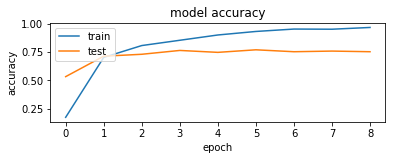

In [153]:
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(hist.history['acc'])  
plt.plot(hist.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

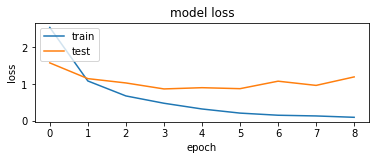

In [154]:
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

# Potting the confusion matrix

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [156]:
Y_pred = model.predict(X_test)
#print(Y_pred)

y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)

target_names = ['class 0(1)', 'class 1(2)','class 2(3)', 'class 3(4)','class 4(5)', 'class 5(6)','class 6(7)', 'class 7(8)','class 8(9)',
                'class 9(10)','class 10(11)','class 11(12)','class 12(13)','class 13(14)','class 14(15)']

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names = target_names))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

  class 0(1)       0.67      0.50      0.57        16
  class 1(2)       0.94      0.94      0.94        18
  class 2(3)       0.75      0.45      0.56        20
  class 3(4)       0.80      0.73      0.76        11
  class 4(5)       0.83      0.94      0.88        16
  class 5(6)       1.00      0.50      0.67        22
  class 6(7)       0.89      0.94      0.91        17
  class 7(8)       0.80      0.62      0.70        13
  class 8(9)       0.35      0.50      0.41        16
 class 9(10)       0.74      0.82      0.78        17
class 10(11)       0.69      0.64      0.67        14
class 11(12)       0.64      0.75      0.69        12
class 12(13)       0.54      0.70      0.61        10
class 13(14)       0.61      1.00      0.76        11
class 14(15)       0.69      1.00      0.82         9

    accuracy                           0.72       222
   macro avg       0.73      0.74      0.72       222
weighted avg       0.75   

# Testing test data

In [157]:
test_image = X_test[0:1]

print(test_image.shape)
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

(1, 100, 100, 1)
[[3.3834378e-05 7.6735008e-04 2.3269947e-04 2.6389639e-04 5.4483920e-01
  1.5406414e-03 3.3366098e-07 1.8290745e-04 4.1122660e-03 6.0296461e-05
  3.1516932e-02 3.7070516e-01 3.4578301e-02 8.2272887e-03 2.9390187e-03]]
[4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


# Saving The model

In [158]:
from keras.models import load_model

In [159]:
model.save('model_.h5')
print('model saved as')

model saved as


# Predicting the result of a new image

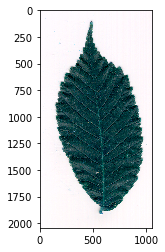

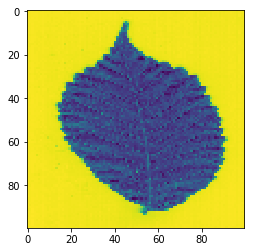

(100, 100)


In [163]:
input_image = cv2.imread('swedish dataset test/l9nr075.tif')
plt.imshow(input_image)
plt.show()

input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

input_image = cv2.resize(input_image,(100,100))
plt.imshow(input_image)
plt.show()

input_image = np.array(input_image)
input_image = input_image.astype('float32')
input_image /= 255

print(input_image.shape)

In [164]:
input_image = np.expand_dims(input_image, axis= 0)
input_image = np.expand_dims(input_image, axis= 3)
print(input_image.shape)

(1, 100, 100, 1)


In [170]:
#print((model.predict(input_image)))
print('------------------------------------------------------------')

print('CLASSS:',model.predict_classes(input_image))

------------------------------------------------------------
CLASSS: [8]


In [171]:
model.predict_proba

<bound method Sequential.predict_proba of <keras.engine.sequential.Sequential object at 0x000001D9BCDD20F0>>

In [172]:
score, accuracy = model.evaluate(X_test, y_test, batch_size=20)

222/222 [==============================] - 5s 23ms/step


In [173]:
print('Test Score:',score)
print('Test accuracy:',accuracy)

Test Score: 1.1519624276069906
Test accuracy: 0.7162162183641313
